#MNISTのような手書き文字を生成してみる。
* ## まずは、MNISTの分類機を作る
* ## 次に、ランダムな配列 [𝑝1,⋯,𝑝10] が与えられた時に、MNISTっぽい画像を出力する物を作る。
## ただし、 1≥𝑝𝑖≥0 　かつ　 $\sum^{10}_{𝑖=1} p_i \sim 1$ とする

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

import os
import time 

## MNISTのダウンロードと規格化

In [18]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [19]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [20]:
train_images = train_images/255.0
train_labels = to_categorical( train_labels, num_classes = 10)

## Generatorを作る

In [21]:
def make_generator_model():
  model = tf.keras.Sequential()
  model.add(layers.Dense(128, input_shape=(10,), activation='relu'))
  model.add(layers.Dense(28*28, activation='sigmoid'))
  model.add(layers.Reshape( (28,28) ) )
  return model

テストしてみる

In [22]:
## Test the generator
generator = make_generator_model()
generator(tf.reshape( train_labels[0], (1,10) ) ).shape
## TensorShape([1, 28, 28])

TensorShape([1, 28, 28])

## Labelから手書きっぽい画像を出すように訓練する

In [24]:
generator.compile(optimizer='adam', loss='mse')
generator.fit(train_labels, train_images, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0591
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0535
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0535
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0535
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0534


## $[1, 0, \cdots, 0]$のようなinputに対するoutput

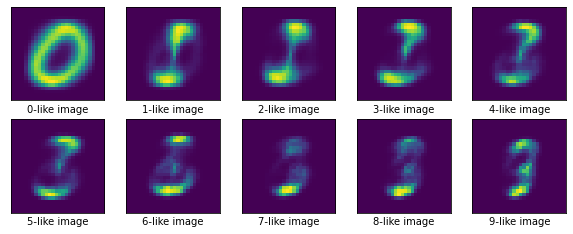

In [27]:
input_for_i = np.zeros((1,10))
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    input_for_i[0, i] =1.0
    i_like_image = generator( input_for_i )*255.0
    plt.imshow(i_like_image[0])
    plt.xlabel('{}-like image'.format(i))
plt.show()

## 少し揺らぎを加えたinputを与えてみる

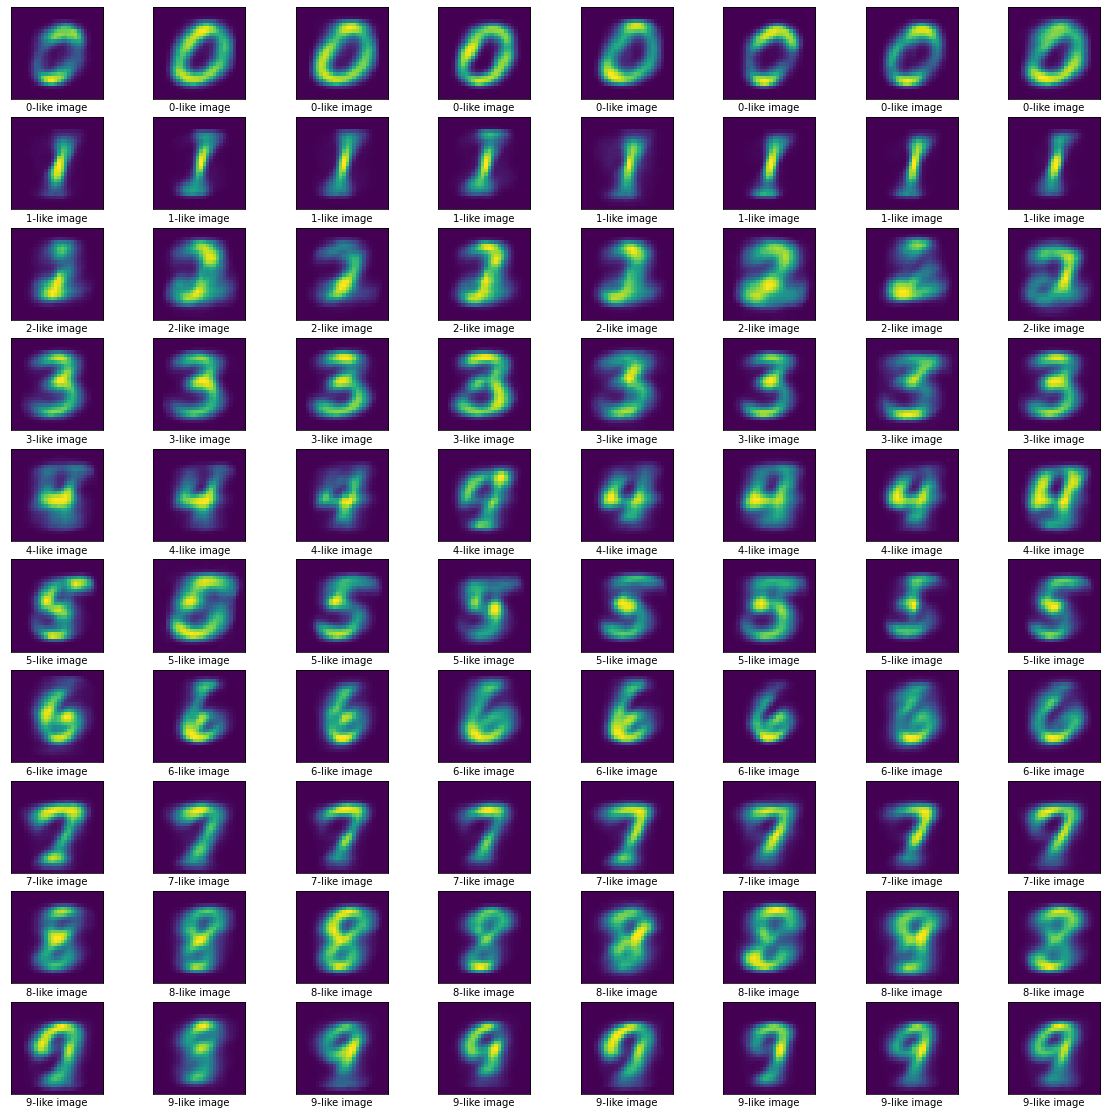

In [28]:
pattern_number = 8
plt.figure(figsize=(20,20))
for i in range(10):
  for pattern in range(pattern_number):
    plt.subplot(10,pattern_number, i*pattern_number+1+pattern)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    input_for_i = np.random.normal(0,0.2,(1,10))
    input_for_i[0, i] =input_for_i[0, i] + 1.0
    i_like_image = generator( input_for_i )*255.0
    plt.imshow(i_like_image[0])
    plt.xlabel('{}-like image'.format(i))
plt.show()